In [1]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os
print(os.listdir("../input/fruits-fresh-and-rotten-for-classification/dataset/train/"))

['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [2]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("../input/fruits-fresh-and-rotten-for-classification/dataset/train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
fruit_images = fruit_images.reshape(len(fruit_images),-1)
labels = np.array(labels)

In [3]:
print(np.shape(fruit_images))

(10901, 12100)


In [4]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#clf = svm.SVC(decision_function_shape='ovo')
#clf = svm.SVC()
clf=RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(fruit_images, labels)

RandomForestClassifier(max_depth=9, random_state=0)

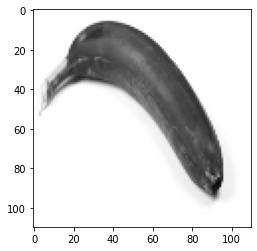

In [5]:
import matplotlib.pyplot as plt
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("../input/fruits-fresh-and-rotten-for-classification/dataset/test/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
plt.imshow(cv2.cvtColor(validation_fruit_images[1], cv2.COLOR_GRAY2RGB))
plt.show()
#cv2.imshow(validation_fruit_images[1])
validation_fruit_images = validation_fruit_images.reshape(len(validation_fruit_images),-1)
validation_labels = np.array(validation_labels)

In [6]:
print(np.shape(validation_fruit_images))


(2698, 12100)


In [7]:
print(validation_fruit_images[9])
print(validation_labels[9])
print(fruit_images[9])
print(labels[9])
for i in range(1,298,30):
    check=clf.predict([fruit_images[i]])
    print(check,"correct label", labels[i])

[255 255 255 ... 255 255 255]
rottenbanana
[255 255 255 ... 255 255 255]
rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenapples'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana
['rottenbanana'] correct label rottenbanana


In [8]:
print(np.shape(validation_fruit_images))


(2698, 12100)


In [9]:
count=0 
total = np.shape(validation_fruit_images)[0]
#print(total)
for i in range(total):
    check=clf.predict([validation_fruit_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

2113
Accuracy is  0.7831727205337287
